In [35]:
import os

In [118]:
import pandas as pd
from matplotlib import pyplot
from matplotlib import pyplot as plt 
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from pylab import rcParams
rcParams['figure.figsize']=20,5

In [119]:
import warnings
warnings.filterwarnings('ignore')

In [120]:
electricitytimeseries=pd.read_csv('Electric_Production.csv',header=0,index_col=0)

In [121]:
electricitytimeseries.shape

(397, 1)

In [122]:
electricitytimeseries.head(20)

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151
06-01-1985,58.0904
07-01-1985,62.6202
08-01-1985,63.2485
09-01-1985,60.5846


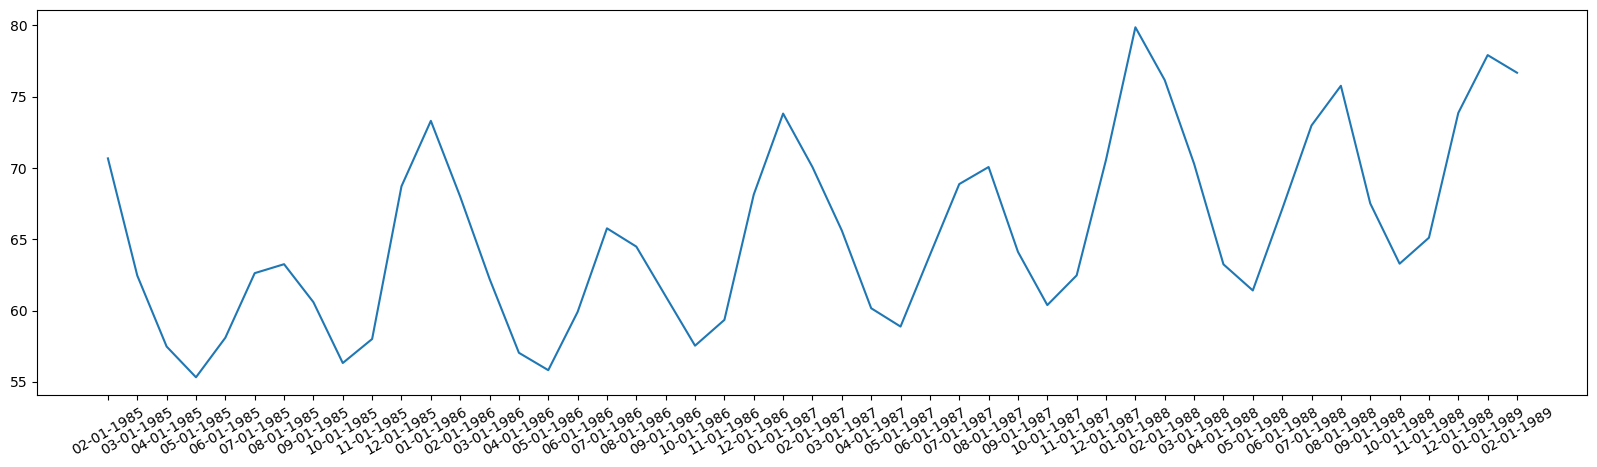

In [124]:
plt.plot(electricitytimeseries[1:50]['Value'])#
plt.xticks(rotation=30)
plt.show()

In [131]:
#Moving average method

In [132]:
rollingseries=electricitytimeseries[1:50].rolling(window=5)
rollingmean=rollingseries.mean()
print(rollingmean.head(10))

               Value
DATE                
02-01-1985       NaN
03-01-1985       NaN
04-01-1985       NaN
05-01-1985       NaN
06-01-1985  60.79982
07-01-1985  59.18946
08-01-1985  59.34912
09-01-1985  59.97176
10-01-1985  60.17182
11-01-1985  60.15384


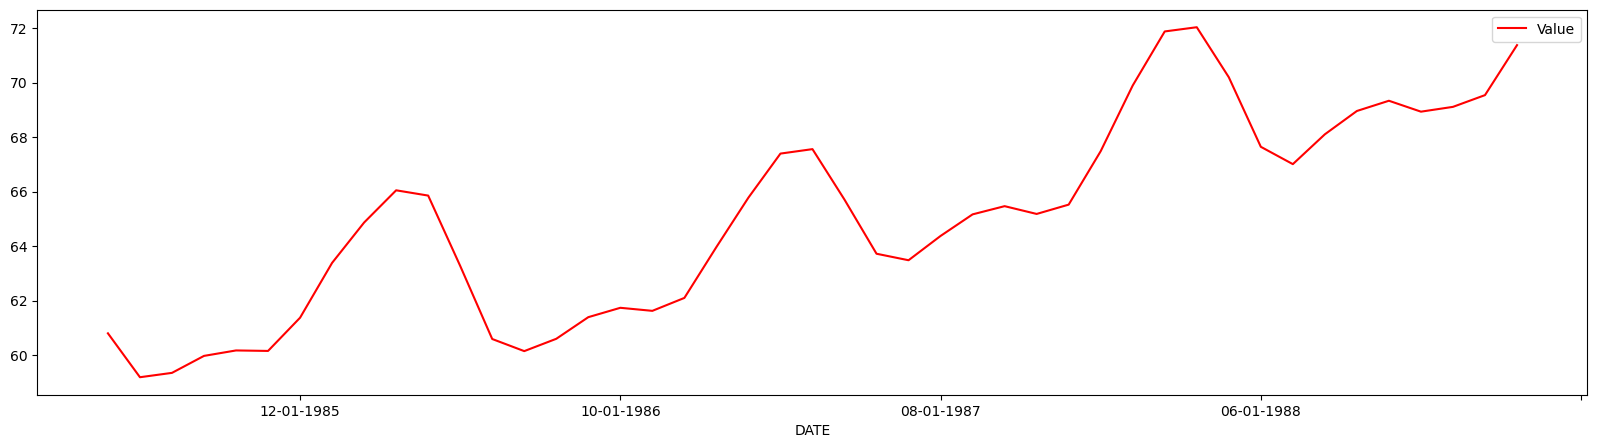

In [130]:
rollingmean.plot(color='red')
pyplot.show()

In [ ]:
#simple exponential smoothening single

In [136]:
data=electricitytimeseries[1:50]

fit1=SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fit2=SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

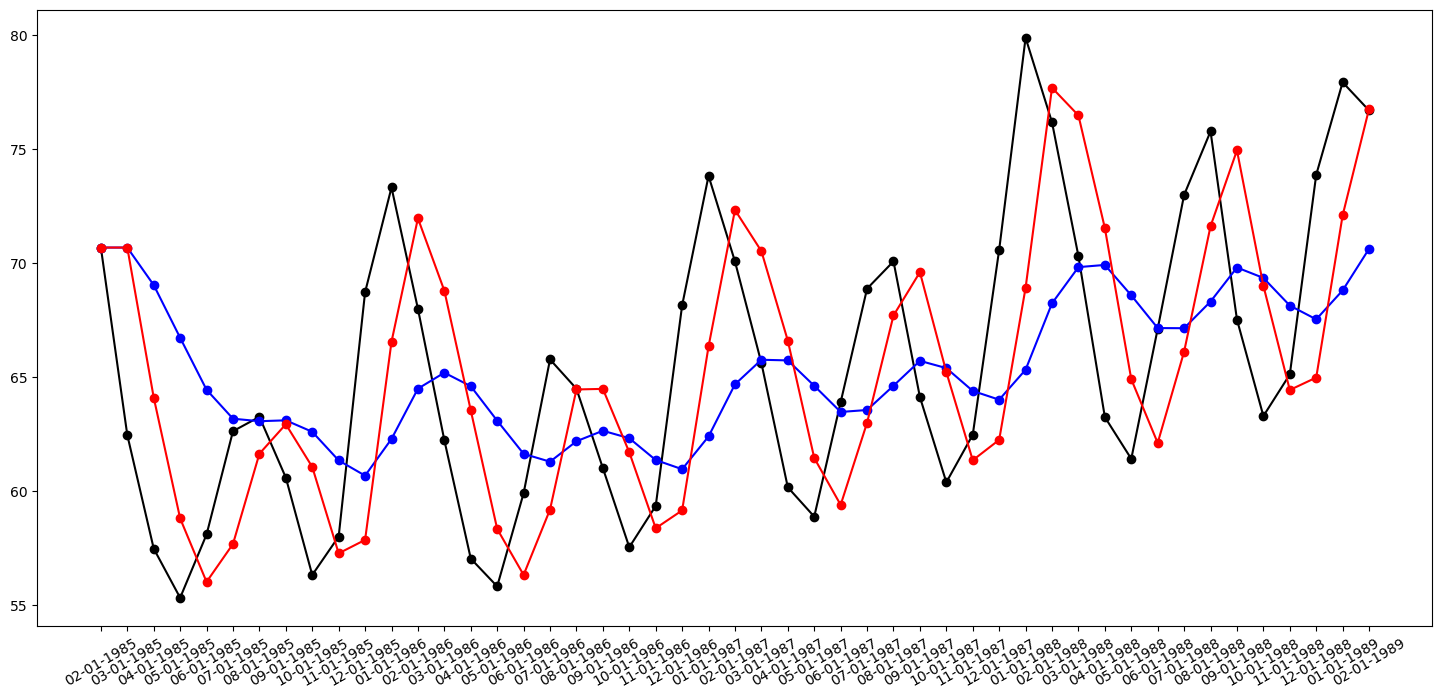

In [138]:
plt.figure(figsize=(18,8))
plt.plot(electricitytimeseries[1:50],marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='o',color='red')

In [139]:
#holt method for exponential smoothing

In [141]:
fit1=Holt(data).fit()
fit2=Holt(data,exponential=True).fit()

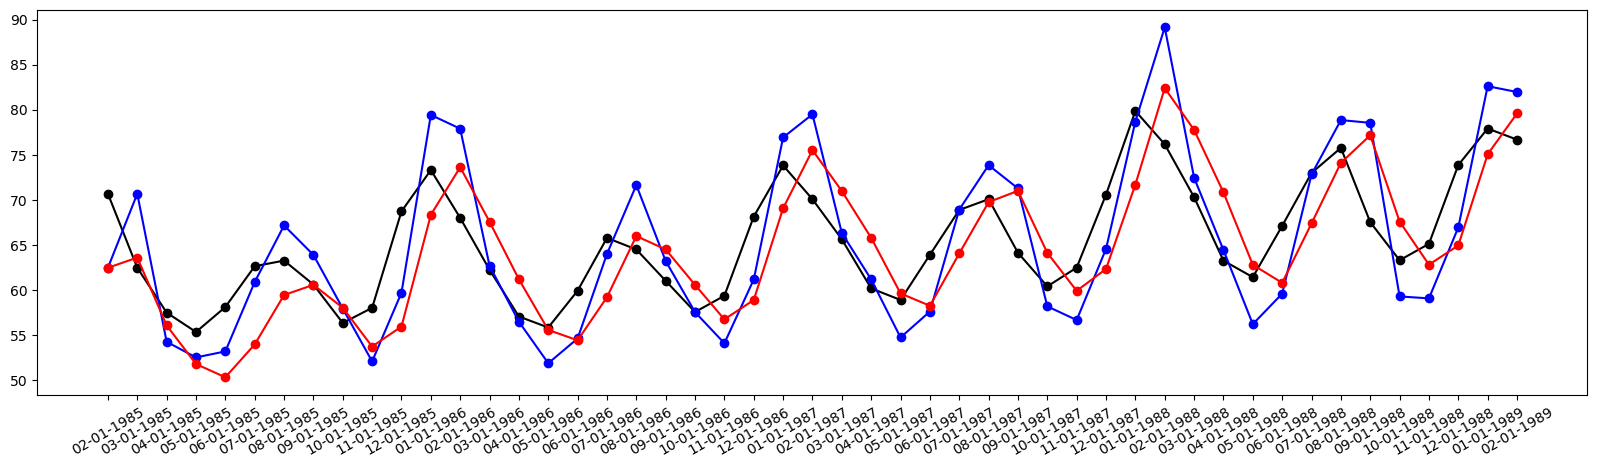

In [142]:
plt.plot(data,marker='o',color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues,marker='o',color='blue')
plt.plot(fit2.fittedvalues,marker='o',color='red')